# Thuật toán K-Means

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Đọc dữ liệu

In [3]:
blobs = pd.read_csv("D:\Kì 6\Khai thác dữ liệu\Tuần 6\data.csv")
colnames = list(blobs.columns[1:-1])
blobs.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


### Sử dụng cột phân cụm để hiển thị các nhóm khác nhau 

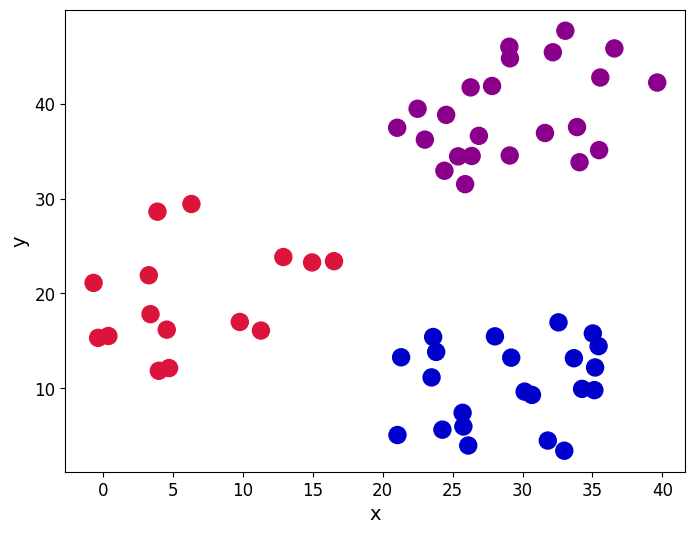

In [4]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150, c=blobs['cluster'].astype('category'), cmap=customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Xác định k và khởi tạo các tâm

In [5]:
def initiate_cetroids(k, dset):
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = blobs[['x', 'y']]
centroids = initiate_cetroids(k, df)
centroids

,x,y
0,24.412,32.932
5,25.893,31.515
36,26.878,36.609


### Tính khoảng cách

In [6]:
def rsserr(a, b):
    return np.sum(np.square(a-b))

In [7]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid, :], df.iloc[36, :])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 19.60
Error for centroid 1: 26.92
Error for centroid 2: 0.00


### Gán các giá trị tâm

In [8]:
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(n):
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs, :])
            all_errors = np.append(all_errors, err)
        
        nearest_centroid = np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)
    return assignation, assign_errors


### Thêm cột gán tâm và sai số phát sinh

In [9]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16512\3199595029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,x,y,centroid,error
0,24.412,32.932,0,0.000000
1,35.190,12.189,1,459.928485
2,26.288,41.718,2,26.449981
3,0.376,15.506,0,881.394772
4,26.116,3.963,1,759.162433


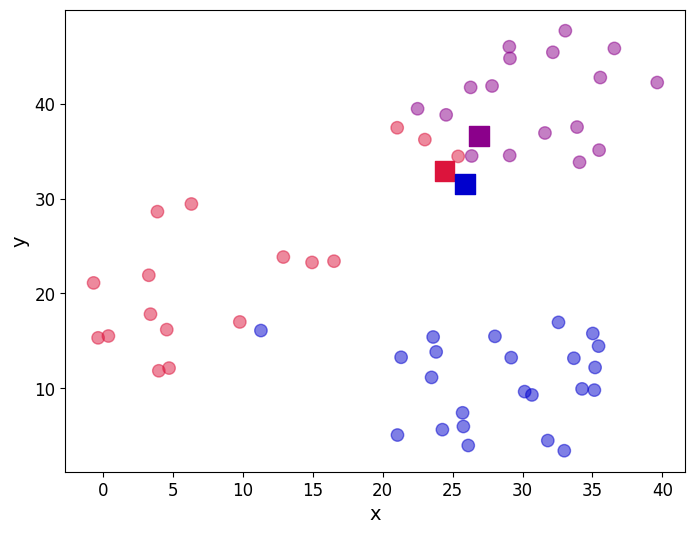

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker = 'o', c=df['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', s=200, c=[0, 1, 2],
            cmap=customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Tổng các sai số

In [11]:
print("The total error is {0:.2f}".format(df['error'].sum()))


The total error is 20597.88


### Cập nhật vị trí của k tâm bằng việc tính giá trị trung bình của các quan sát được gán cho mỗi tâm

In [12]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop=True)
centroids

,x,y
0,9.855944,23.242278
1,28.185750,11.543500
2,30.759333,40.311167


### Biểu đồ phân tán với vị trí k tâm đã được cập nhật

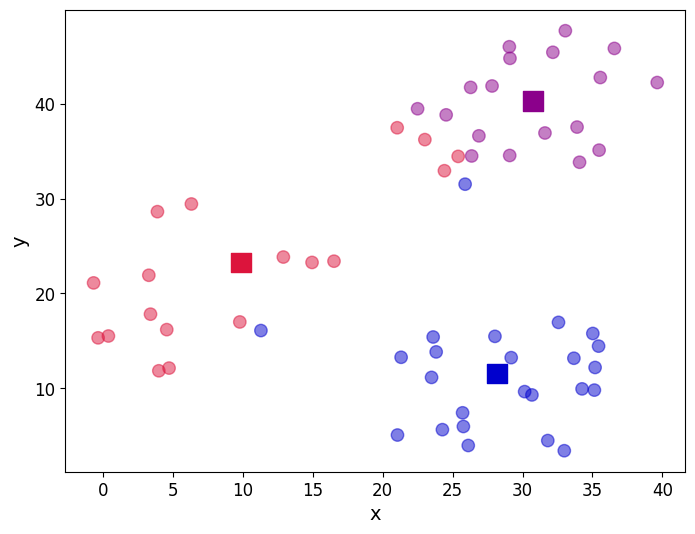

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker = 'o', c=df['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', s=200, c=[0, 1, 2],
            cmap=customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Lặp lại các bước trên

In [14]:
def kmeans(dset, k=2, tol=1e-4):
    working_dset = dset.copy()
    err = []
    goahead = True
    j = 0

    centroids = initiate_cetroids(k, dset)

    while(goahead):
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
        err.append(sum(j_err))

        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop=True)

        if j>0:
            if err[j-1] - err[j] <= tol:
                goahead = False
        j += 1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop=True)
    return working_dset['centroid'], j_err, centroids


In [15]:
np.random.seed(42)
df['centroid'], df['error'], centroids = kmeans(df[['x', 'y']], 3)
df.head()

,x,y,centroid,error
0,24.412,32.932,2,61.125920
1,35.190,12.189,1,40.695912
2,26.288,41.718,2,16.059349
3,0.376,15.506,0,51.792896
4,26.116,3.963,1,50.470613


### Vị trí các tâm cuối cùng

In [16]:
centroids

,x,y
0,6.322667,19.559400
1,29.058136,10.429409
2,29.278870,39.050783


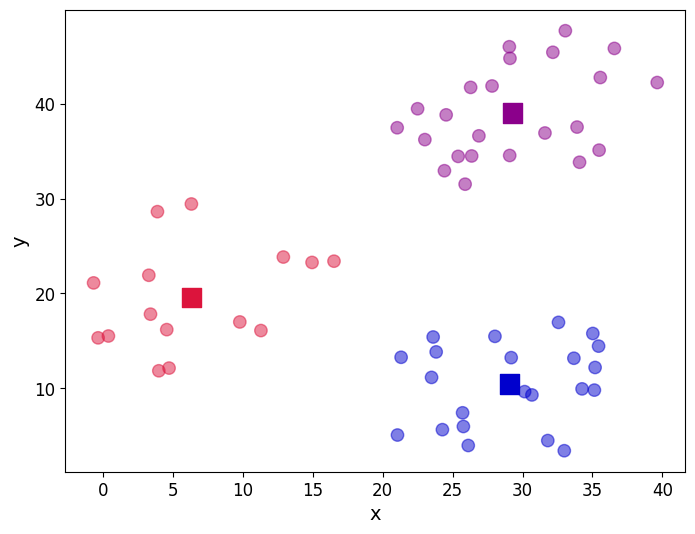

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker = 'o', c=df['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', s=200, c=[0, 1, 2],
            cmap=customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Sử dụng elbow để chỉ ra số cụm tối ưu

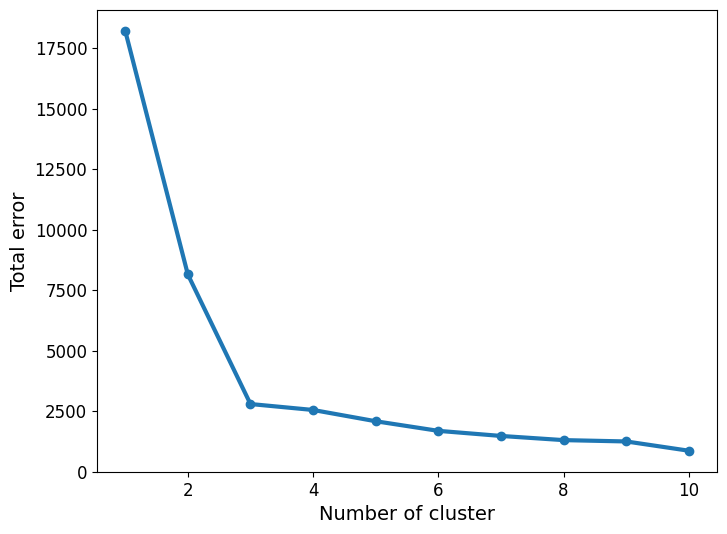

In [18]:
err_total = []
n = 10
df_elbow = blobs[['x', 'y']]
for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of cluster', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Thuật toán K-Medians

### Đọc dữ liệu

In [30]:
blobs = pd.read_csv("D:\Kì 6\Khai thác dữ liệu\Tuần 6\data.csv")
colnames = list(blobs.columns[1:-1])
blobs.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


### Sử dụng cột phân cụm để hiển thị các nhóm khác nhau 

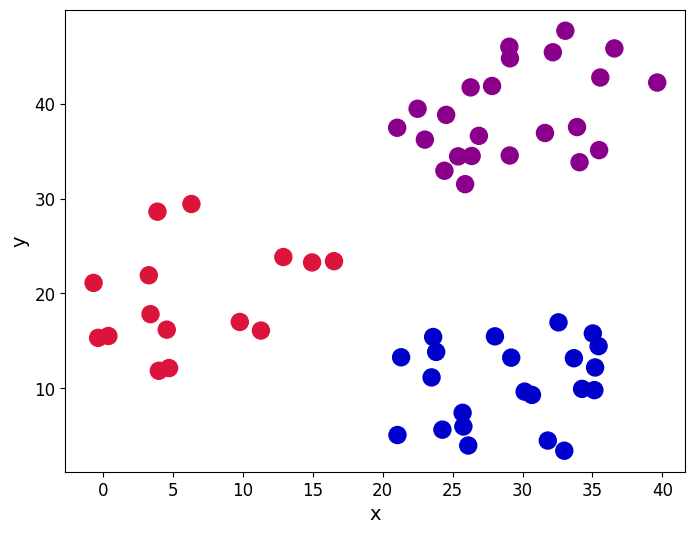

In [31]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150, c=blobs['cluster'].astype('category'), cmap=customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Xác định k và khởi tạo các tâm

In [32]:
def initiate_cetroids(k, dset):
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=6
df = blobs[['x', 'y']]
centroids = initiate_cetroids(k, df)
centroids

,x,y
0,24.412,32.932
5,25.893,31.515
36,26.878,36.609
45,29.101,44.781
13,25.768,5.967
54,21.034,37.463


### Tính khoảng cách

In [33]:
def rsserr(a, b):
    return np.sum(np.abs(a - b))

In [34]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid, :], df.iloc[36, :])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 6.14
Error for centroid 1: 6.08
Error for centroid 2: 0.00
Error for centroid 3: 10.39
Error for centroid 4: 31.75
Error for centroid 5: 6.70


### Gán các giá trị tâm

In [35]:
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(n):
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs, :])
            all_errors = np.append(all_errors, err)
        
        nearest_centroid = np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)
    return assignation, assign_errors


### Thêm cột gán tâm và sai số phát sinh

In [36]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16512\3199595029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,x,y,centroid,error
0,24.412,32.932,0,0.000
1,35.190,12.189,4,15.644
2,26.288,41.718,2,5.699
3,0.376,15.506,4,34.931
4,26.116,3.963,4,2.352


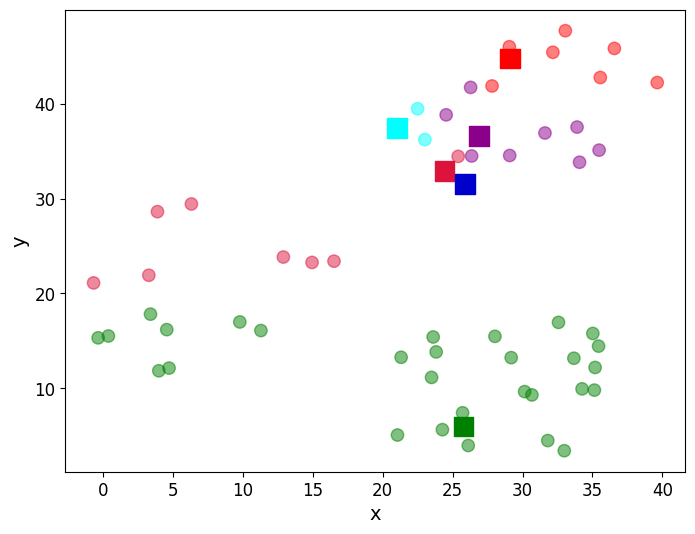

In [37]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta", "red", "green", "cyan"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker = 'o', c=df['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', s=200, c=[0, 1, 2, 3, 4, 5],
            cmap=customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Tổng các sai số

In [38]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 740.13


### Cập nhật vị trí của k tâm bằng việc tính giá trị trung bình của các quan sát được gán cho mỗi tâm

In [39]:
centroids = df.groupby('centroid').agg('median').loc[:, colnames].reset_index(drop=True)
centroids

,x,y
0,12.8910,23.832
1,25.8930,31.515
2,29.0810,36.609
3,32.6155,45.101
4,25.7400,12.676
5,22.4930,37.463


### Biểu đồ phân tán với vị trí k tâm đã được cập nhật

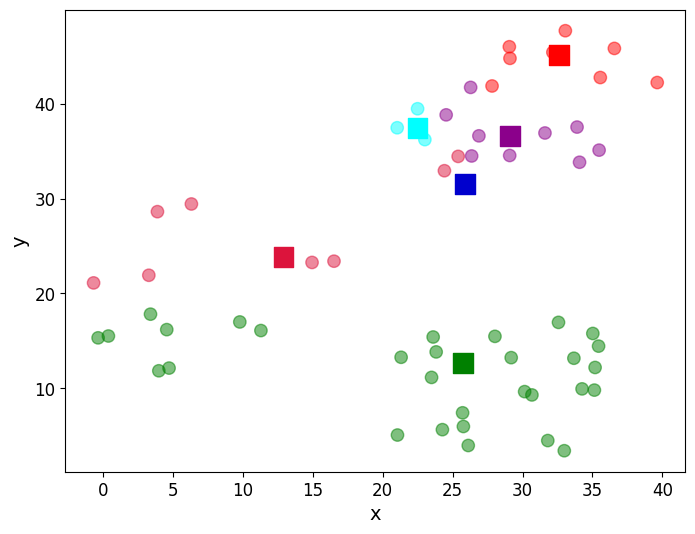

In [40]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta", "red", "green", "cyan"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker = 'o', c=df['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', s=200, c=[0, 1, 2, 3, 4, 5],
            cmap=customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Lặp lại các bước trên

In [41]:
def kmedians(dset, k=2, tol=1e-4):
    working_dset = dset.copy()
    err = []
    goahead = True
    j = 0

    centroids = initiate_cetroids(k, dset)

    while(goahead):
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
        err.append(sum(j_err))

        centroids = working_dset.groupby('centroid').agg('median').reset_index(drop=True)

        if j>0:
            if err[j-1] - err[j] <= tol:
                goahead = False
        j += 1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('median').reset_index(drop=True)
    return working_dset['centroid'], j_err, centroids


In [42]:
np.random.seed(42)
df['centroid'], df['error'], centroids = kmedians(df[['x', 'y']], 3)
df.head()

,x,y,centroid,error
0,24.412,32.932,2,9.247
1,35.190,12.189,1,7.173
2,26.288,41.718,2,6.951
3,0.376,15.506,0,6.478
4,26.116,3.963,1,10.127


### Vị trí các tâm cuối cùng

In [43]:
centroids

,x,y
0,4.5500,17.8100
1,29.6695,10.5365
2,29.0560,37.5350


ValueError: 'c' argument has 6 elements, which is inconsistent with 'x' and 'y' with size 3.

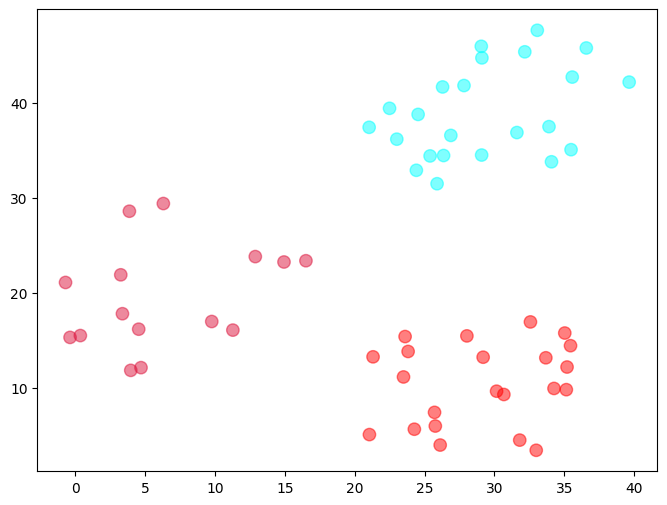

In [44]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta", "red", "green", "cyan"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker = 'o', c=df['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='s', s=200, c=[0, 1, 2, 3, 4, 5],
            cmap=customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Sử dụng elbow để chỉ ra số cụm tối ưu

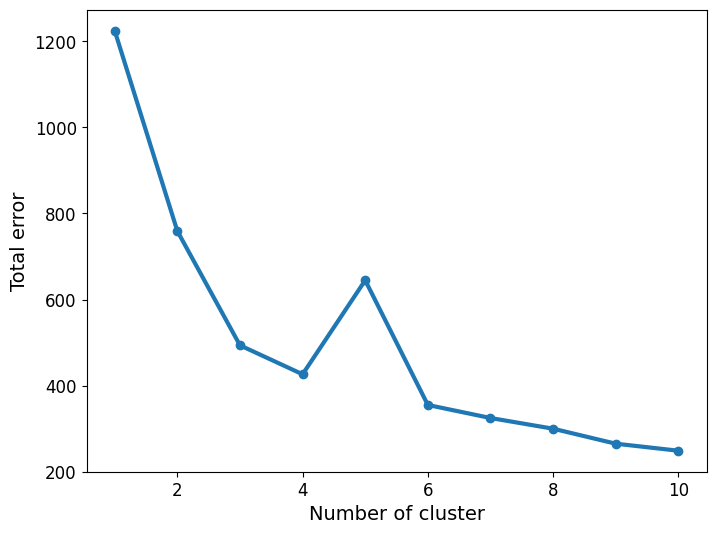

In [ ]:
err_total = []
n = 10
df_elbow = blobs[['x', 'y']]
for i in range(n):
    _, my_errs, _ = kmedians(df_elbow, i+1)
    err_total.append(sum(my_errs))

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of cluster', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
